# Airline Analysis

Dataset columns descriptions:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


In [ ]:
!pip install statsmodels

In [17]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


In [18]:
## Reading the Data
airline_df = pd.read_csv(r"C:\Users\magak\Desktop\Projects\Airline Analysis\Data\Airline Dataset.csv")
airline_df.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [ ]:
#Checking data types
airline_df.info()

In [ ]:
#Checking missing values
airline_df.isnull().sum()

In [ ]:
#Checking duplicates
airline_df.duplicated().sum()

# Exploratory Data Analysis

Price Analysis

In [19]:
#Checking descriptive statistics
airline_df.describe()

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


Coach Prices: 
Maximum price - 593, 
Minimum price - 44,
Mean Price - 376,
Median - 380

First Class Prices: 
Maximum price - 1846, 
Minimum price - 939,
Mean Price - 1454,
Median - 1503

In [ ]:
#Plotting the data of coach price

plt.figure(figsize=(12,6))
sns.histplot(airline_df['coach_price'], kde=True)
plt.title('Distribution of Coach Price')
plt.show()

In [ ]:
#Plotting the data of First class price

plt.figure(figsize=(12,6))
sns.histplot(airline_df['firstclass_price'], kde=True)
plt.title('Distribution of First Class Price')
plt.show()

Long flights Analysis

In [ ]:
#Distribution of coach price for 8 hour flights
eight_hour_flight=airline_df[airline_df['hours'] == 8]

#Plotting the data of coach price for 8 hour flights
plt.figure(figsize=(12,6))
sns.histplot(eight_hour_flight['coach_price'], kde=True)
plt.title('Distribution of Coach Price for 8 hour flights')
plt.show()

For 8 hour flight, Maximum price - 593, Lowest price - 170, Mean -431 and Median 437. 

Price vs Number of passengers

In [ ]:
sns.lmplot(x = "hours", y = "passengers", data = airline_df, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

# Price vs Flight Distance

In [ ]:
#Scatter plot to see the relationship between ddistance and prices
sns.scatterplot(x='miles', y='coach_price', data=airline_df)
plt.title('Distance vs Price')
plt.xlabel('Miles traveled')
plt.ylabel('Couch Price')
plt.show()

In [ ]:
#Scatter plot to see the relationship between ddistance and First class prices
sns.scatterplot(x='miles', y='firstclass_price', data=airline_df)
plt.title('Distance vs Price')
plt.xlabel('Miles traveled')
plt.ylabel('first class price')
plt.show()

Both coach and first-class fares show a somewhat random distribution, with prices spread out for similar distances. There isn't an immediate visible trend, such as increasing price with increasing distance, which could indicate other factors (like services offered, days of the week, or booking timing) playing a role.We will explore correlation of price and other factors.

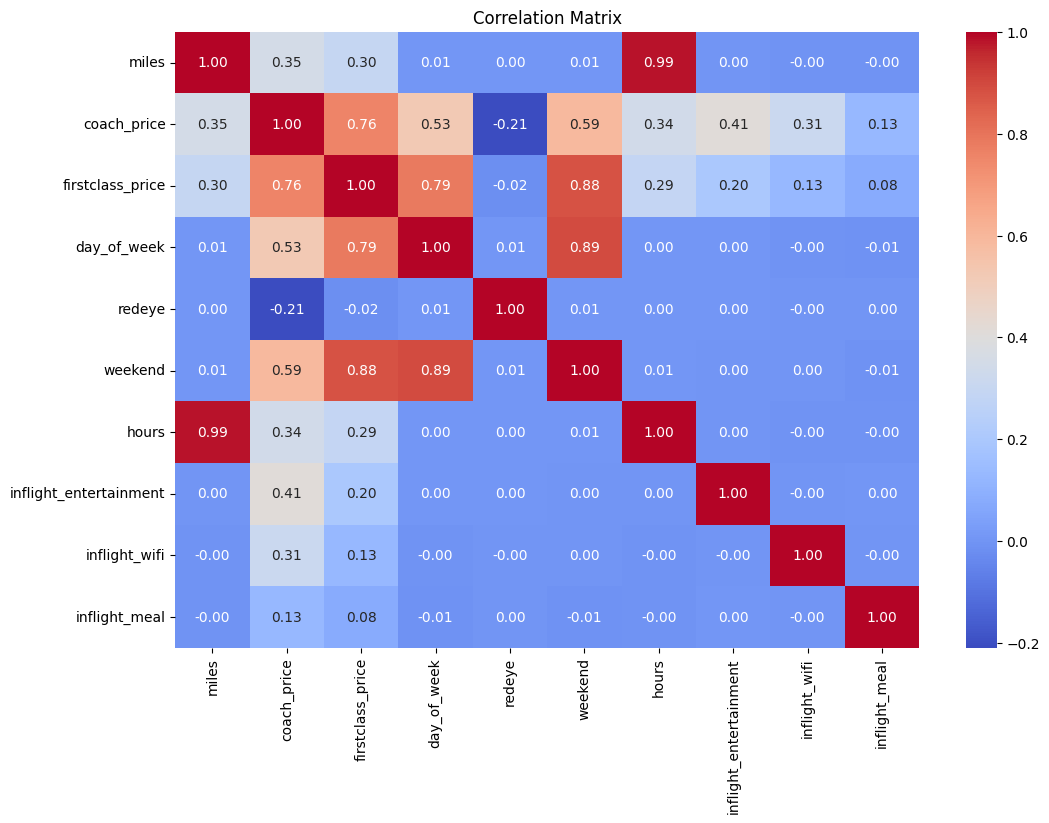

In [34]:
# Convert categorical columns to numeric for correlation calculation
# 'day_of_week': Assigning numerical values for each day (e.g., Monday = 1, ..., Sunday = 7)
# 'redeye' and 'weekend': Convert 'Yes'/'No' to 1/0

airline_df_num= airline_df.copy()

# Mapping day_of_week to numerical values (Monday = 1, ..., Sunday = 7)
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
airline_df_num['day_of_week'] = airline_df_num['day_of_week'].map(day_mapping)

# Convert 'Yes'/'No' columns ('redeye' and 'weekend') to 1/0
airline_df_num['redeye'] = airline_df_num['redeye'].map({'Yes': 1, 'No': 0})
airline_df_num['weekend'] = airline_df_num['weekend'].map({'Yes': 1, 'No': 0})
airline_df_num['inflight_entertainment'] = airline_df_num['inflight_entertainment'].map({'Yes': 1, 'No': 0})
airline_df_num['inflight_wifi'] = airline_df_num['inflight_wifi'].map({'Yes': 1, 'No': 0})
airline_df_num['inflight_meal'] = airline_df_num['inflight_meal'].map({'Yes': 1, 'No': 0})

# Now calculating correlation matrix including these new variables
correlation_matrix_extended = airline_df_num[['miles', 'coach_price', 'firstclass_price', 'day_of_week', 'redeye', 'weekend', 'hours','inflight_entertainment','inflight_wifi','inflight_meal']].corr()

# Display the extended correlation matrix
correlation_matrix_extended

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


There is positive correlation between Prices and days of the week/Weekends. With a strong correlation with the first class prices on the days of the week. 

In [ ]:
#Scatter plot to see the relationship between hours and prices
sns.scatterplot(x='hours', y='coach_price', data=airline_df)
plt.title('Hours vs Price')
plt.xlabel('Flight Duration(hours)')
plt.ylabel('Couch Ticket Price')
plt.show()

#Scatter plot to see the relationship between hours and prices
sns.scatterplot(x='hours', y='firstclass_price', data=airline_df)
plt.title('Hours vs Price')
plt.xlabel('Flight Duration(hours)')
plt.ylabel('First Class Ticket Price')
plt.show()

# Effect of Services on Pricing

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Grouping by services offered by the airline and average price
service_columns = ['inflight_entertainment', 'inflight_wifi', 'inflight_meal']
service_avg_price = airline_df.groupby(service_columns)[['coach_price', 'firstclass_price']].mean().reset_index()

# Performing ANOVA to see if there are significant differences in coach prices based on services
anova_coach = f_oneway(
    airline_df[airline_df['inflight_entertainment'] == '1']['coach_price'],
    airline_df[airline_df['inflight_entertainment'] == '0']['coach_price'],
    airline_df[airline_df['inflight_wifi'] == '1']['coach_price'],
    airline_df[airline_df['inflight_wifi'] == '0']['coach_price'],
    airline_df[airline_df['inflight_meal'] == '1']['coach_price'],
    airline_df[airline_df['inflight_meal'] == 'No']['coach_price']
)

# Perform ANOVA to see if there are significant differences in first-class prices based on services
anova_firstclass = f_oneway(
    airline_df[airline_df['inflight_entertainment'] == 'Yes']['firstclass_price'],
    airline_df[airline_df['inflight_entertainment'] == 'No']['firstclass_price'],
    airline_df[airline_df['inflight_wifi'] == 'Yes']['firstclass_price'],
    airline_df[airline_df['inflight_wifi'] == 'No']['firstclass_price'],
    airline_df[airline_df['inflight_meal'] == 'Yes']['firstclass_price'],
    airline_df[airline_df['inflight_meal'] == 'No']['firstclass_price']
)

print("ANOVA results for coach prices based on services:")
print(anova_coach)

print("\nANOVA results for first-class prices based on services:")
print(anova_firstclass)

For both coach and first-class prices, the extremely low p-values indicate that inflight services have a substantial impact on ticket pricing. These results suggest that offering or not offering particular services (like meals, entertainment, and wifi) is likely associated with significant variations in ticket prices. Given the significant results, it would be beneficial to conduct a post-hoc test (such as Tukey’s HSD) to pinpoint which specific combinations are driving these differences

# Weekend Vs Weekday Pricing 

In [48]:
#Number of passengers for weekend and weekday flights
weekend_passengers=airline_df[airline_df['weekend']=='Yes']['passengers'].sum()
weekend_passengers

weekday_passengers=airline_df[airline_df['weekend']=='No']['passengers'].sum()
weekday_passengers

#Percentage of passengers for weekend and weekday flights
total_passengers=airline_df['passengers'].sum()
weekend_percentage=(weekend_passengers/total_passengers)*100
weekday_percentage=(weekday_passengers/total_passengers)*100
print("Percentage of passengers for weekend flights: ",weekend_percentage, "Percentage of passengers for weekday flights: ",weekday_percentage)

Percentage of passengers for weekend flights:  65.19891769183907 Percentage of passengers for weekday flights:  34.80108230816092


In [47]:
#Compare average prices for weekend and weekday flights
weekend_flights=[airline_df[airline_df['weekend']=='Yes']]
weekday_flights=[airline_df[airline_df['weekend']=='No']]
weekend_avg_price=weekend_flights[0]['coach_price'].mean()
weekday_avg_price=weekday_flights[0]['coach_price'].mean()
print("Average price for weekend flights: ",weekend_avg_price, "Average price for weekday flights: ",weekday_avg_price)

#Perform t-test to see if there are significant differences in coach prices based on weekend flights
ttest_coach = ttest_ind(
    airline_df[airline_df['weekend'] == 'Yes']['coach_price'],
    airline_df[airline_df['weekend'] == 'No']['coach_price']
)

ttest_coach


Average price for weekend flights:  405.84553111302773 Average price for weekday flights:  321.71501993929587


TtestResult(statistic=np.float64(264.2580225509538), pvalue=np.float64(0.0), df=np.float64(129778.0))

Interpretation:
A very high t-statistic (264.26) suggests a large difference between the means of weekday and weekend flight prices. This implies that the price difference between weekday and weekend flights is not due to random chance. There is a significant difference.

With a p-value < 0.05, we reject the null hypothesis. This result indicates that there is a statistically significant difference between the average prices of weekday flights and weekend flights.


Since weekday flights are cheaper than weekend flights, this could provide useful guidance for clients looking for the best deal, based on the day of travel. A follow-up analysis could reveal which specific days (e.g., Fridays vs. Saturdays) contribute most to this price difference, helping further refine travel recommendations.

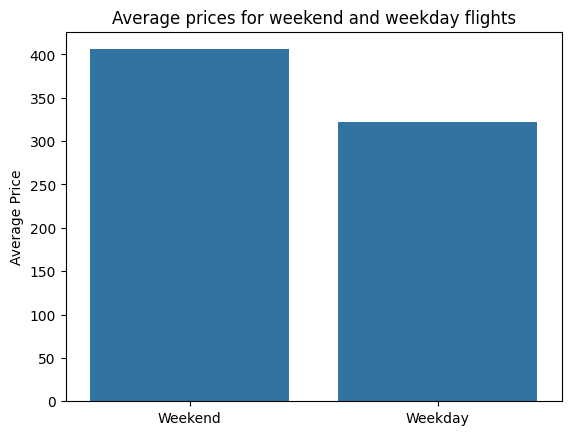

In [30]:
#Plotting the average prices for weekend and weekday flights
sns.barplot(x=['Weekend','Weekday'], y=[weekend_avg_price,weekday_avg_price])
plt.title('Average prices for weekend and weekday flights')
plt.ylabel('Average Price')
plt.show()

Which day of the weekend contributes to more traffic?

In [44]:
#compare traffic for Friday, Saturday and Sunday
friday_traffic=airline_df[airline_df['day_of_week']=='Friday']['passengers'].sum()
saturday_traffic=airline_df[airline_df['day_of_week']=='Saturday']['passengers'].sum()
sunday_traffic=airline_df[airline_df['day_of_week']=='Sunday']['passengers'].sum()
print("Traffic on Friday: ",friday_traffic, "Traffic on Saturday: ",saturday_traffic, "Traffic on Sunday: ",sunday_traffic)

Traffic on Friday:  4695676 Traffic on Saturday:  7004780 Traffic on Sunday:  5876071


Average price for Friday flights:  401.52342363660495
Average price for Saturday flights:  411.9931945103154
Average price for Sunday flights:  401.9696725917026


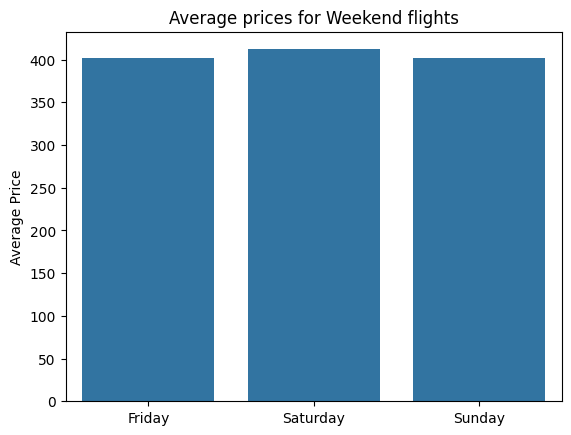

In [45]:
# Compare average prices for Friday,Saturday and Sunday flights
friday_flights = airline_df[airline_df['day_of_week'] == 'Friday']
saturday_flights = airline_df[airline_df['day_of_week'] == 'Saturday']
sunday_flights = airline_df[airline_df['day_of_week'] == 'Sunday']

friday_avg_price = friday_flights['coach_price'].mean()
saturday_avg_price = saturday_flights['coach_price'].mean()
sunday_avg_price = sunday_flights['coach_price'].mean()

print("Average price for Friday flights: ", friday_avg_price)
print("Average price for Saturday flights: ", saturday_avg_price)
print("Average price for Sunday flights: ", sunday_avg_price)

# Plotting the average prices for Saturday and Sunday flights
sns.barplot(x=['Friday','Saturday', 'Sunday'], y=[friday_avg_price,saturday_avg_price, sunday_avg_price])
plt.title('Average prices for Weekend flights')
plt.ylabel('Average Price')
plt.show()

# Red Eye Flights and Pricing

In [49]:
#Price comparison for Red-eye and regular flights
redeye_flights=[airline_df[airline_df['redeye']=='Yes']]
regular_flights=[airline_df[airline_df['redeye']=='No']]
redeye_avg_price=redeye_flights[0]['coach_price'].mean()
regular_avg_price=regular_flights[0]['coach_price'].mean()

print("Average price for Red-eye flights: ",redeye_avg_price, "Average price for regular flights: ",regular_avg_price)

#Perform t-test to see if there are significant differences in coach prices based on Red-eye flights
ttest_coach = ttest_ind(
    airline_df[airline_df['redeye'] == 'Yes']['coach_price'],
    airline_df[airline_df['redeye'] == 'No']['coach_price']
)

ttest_coach

Average price for Red-eye flights:  314.5112348743407 Average price for regular flights:  379.82952571877996


TtestResult(statistic=np.float64(-77.17692059625071), pvalue=np.float64(0.0), df=np.float64(129778.0))

Interpretation:
With a p-value < 0.05, we reject the null hypothesis. This result indicates that there is a statistically significant difference between the average prices of red eye flights and regular flights.

In [ ]:
#Plotting the average prices for Red-eye and regular flights
sns.barplot(x=['Red-eye','Regular'], y=[redeye_avg_price,regular_avg_price])
plt.title('Average prices for Red-eye and regular flights')
plt.ylabel('Average Price')
plt.show()

# Impact of Delays on Flights

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [52]:
#categorize delays into different categories
airline_df['delay_category'] = pd.cut(airline_df['delay'], bins=[-1, 0, 15, 30, 60, 120, 180, np.inf], labels=['No delay', '0-15 mins', '15-30 mins', '30-60 mins', '1-2 hours', '2-3 hours','3+ hours'])

In [53]:
airline_df['delay_category'].value_counts()

delay_category
0-15 mins     98155
15-30 mins    15394
No delay      10139
30-60 mins     5992
3+ hours        100
1-2 hours         0
2-3 hours         0
Name: count, dtype: int64

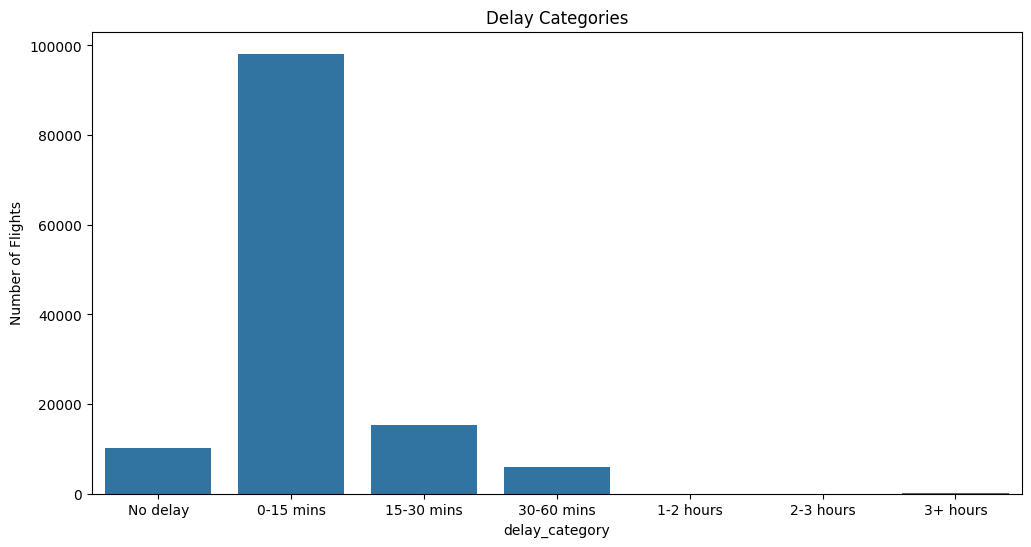

In [57]:
#Plotting the delay categories
plt.figure(figsize=(12,6))
sns.barplot(x=airline_df['delay_category'].value_counts().index, y=airline_df['delay_category'].value_counts().values)
plt.title('Delay Categories')
plt.ylabel('Number of Flights')
plt.show()

In [ ]:
#Compare average prices for different delay categories
average_prices_by_delay = airline_df.groupby('delay_category')[['coach_price', 'firstclass_price']].mean()

average_prices_by_delay